In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Post_DC/P3/df.csv")
df.drop(columns=['Unnamed: 0'],inplace=True, axis=1)
df['coin']=df['coin'].str[:-4]
print(df.shape)
df.head()

(182855, 30)


,Date,Open,High,Low,Close,Adj Close,Volume,coin,Market_Cap,Pct_Change,...,Open_1m_std,Open_3m_std,Open_6m_std,Open_12m_std,Open_24m_std,Open_1m_volatility,Open_3m_volatility,Open_6m_volatility,Open_12m_volatility,Open_24m_volatility
0,2019-01-01,0.002876,0.002930,0.002784,0.002913,0.002913,331289.0,AAC,965.044878,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-02,0.002928,0.002953,0.002757,0.002872,0.002872,305086.0,AAC,876.206987,-1.407486,...,0.000037,0.000037,0.000037,0.000037,0.000037,NaN,NaN,NaN,NaN,NaN
2,2019-01-03,0.002869,0.003170,0.002736,0.002900,0.002900,317624.0,AAC,921.109588,0.974930,...,0.000032,0.000032,0.000032,0.000032,0.000032,0.027033,0.027033,0.027033,0.027033,0.027033
3,2019-01-04,0.002898,0.002986,0.002797,0.002901,0.002901,435891.0,AAC,1264.519778,0.034483,...,0.000027,0.000027,0.000027,0.000027,0.000027,0.020169,0.020169,0.020169,0.020169,0.020169
4,2019-01-05,0.002898,0.003046,0.002845,0.002907,0.002907,518812.0,AAC,1508.186493,0.206827,...,0.000023,0.000023,0.000023,0.000023,0.000023,0.016522,0.016522,0.016522,0.016522,0.016522


In [ ]:
missing_rows = df[df.isna().any(axis=1)]
missing_rows[missing_rows['PD']==1]

,Date,Open,High,Low,Close,Adj Close,Volume,coin,Market_Cap,Pct_Change,...,Open_1m_std,Open_3m_std,Open_6m_std,Open_12m_std,Open_24m_std,Open_1m_volatility,Open_3m_volatility,Open_6m_volatility,Open_12m_volatility,Open_24m_volatility
7135,2019-01-01,0.071168,0.082055,0.068968,0.075914,0.075914,1200199.0,AMB,91111.910433,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.dropna()

In [ ]:
df['PD'].value_counts()

,count
PD,
0.0,181832
1.0,560


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'coin',
       'Market_Cap', 'Pct_Change', 'Month_Year', 'PD', 'isPenny', 'drawdown',
       'drawdown_percentage', 'Open_1m_avg', 'Open_3m_avg', 'Open_6m_avg',
       'Open_12m_avg', 'Open_24m_avg', 'Open_1m_std', 'Open_3m_std',
       'Open_6m_std', 'Open_12m_std', 'Open_24m_std', 'Open_1m_volatility',
       'Open_3m_volatility', 'Open_6m_volatility', 'Open_12m_volatility',
       'Open_24m_volatility'],
      dtype='object')

In [ ]:
df1=df[['Open', 'High', 'Low', 'Close', 'Volume',
       'Market_Cap', 'isPenny', 'drawdown',
       'drawdown_percentage', 'Open_1m_avg', 'Open_3m_avg', 'Open_6m_avg',
       'Open_12m_avg', 'Open_24m_avg', 'Open_1m_std', 'Open_3m_std',
       'Open_6m_std', 'Open_12m_std', 'Open_24m_std', 'Open_1m_volatility',
       'Open_3m_volatility', 'Open_6m_volatility', 'Open_12m_volatility',
       'Open_24m_volatility','PD']]

In [ ]:
lower_percentile = 10
upper_percentile = 80

non_pd = df1[df1['PD'] == 0]
pd_data = df1[df1['PD'] == 1]

lower_bound = non_pd.quantile(lower_percentile / 100)
upper_bound = non_pd.quantile(upper_percentile / 100)

outliers = ((non_pd < lower_bound) | (non_pd > upper_bound))

non_pd = non_pd[~outliers.any(axis=1)]
df1 = pd.concat([pd_data, non_pd], axis=0)

print(df1.shape)
df1.head()

(37204, 25)


,Open,High,Low,Close,Volume,Market_Cap,isPenny,drawdown,drawdown_percentage,Open_1m_avg,...,Open_3m_std,Open_6m_std,Open_12m_std,Open_24m_std,Open_1m_volatility,Open_3m_volatility,Open_6m_volatility,Open_12m_volatility,Open_24m_volatility,PD
1048,0.006620,0.016861,0.006129,0.008491,3843984.0,32639.268761,1,0.097012,93.612012,0.004617,...,0.002296,0.002095,0.004369,0.022013,0.276600,0.190982,0.172455,0.162004,0.545501,1.0
2033,0.126935,0.130509,0.120951,0.121511,5194855.0,631232.012474,1,0.534216,80.800905,0.112170,...,0.059478,0.053473,0.051806,0.051311,0.079807,0.078082,0.081115,0.081554,0.071299,1.0
3116,0.031044,0.032280,0.030377,0.031070,13619.0,423.142324,1,0.113153,78.471119,0.034326,...,0.009343,0.014487,0.012283,0.022583,0.120749,0.117558,0.172330,0.134692,0.128778,1.0
3530,0.127558,0.156418,0.126433,0.138604,3654155.0,506480.500390,1,0.057863,31.206288,0.150594,...,0.017238,0.026452,0.026558,0.026558,0.043378,0.045730,0.053179,0.052791,0.052791,1.0
3551,0.149565,0.149565,0.120194,0.120429,796779.0,95955.299584,1,0.040447,21.286549,0.131503,...,0.018406,0.024131,0.025997,0.025997,0.166977,0.102651,0.083132,0.079824,0.079824,1.0


In [ ]:
df1['PD'].value_counts()

,count
PD,
0.0,36644
1.0,560


In [ ]:
X=df1[['Open', 'High', 'Low', 'Close', 'Volume',
       'Market_Cap', 'isPenny', 'drawdown',
       'drawdown_percentage', 'Open_1m_avg', 'Open_3m_avg', 'Open_6m_avg',
       'Open_12m_avg', 'Open_24m_avg', 'Open_1m_std', 'Open_3m_std',
       'Open_6m_std', 'Open_12m_std', 'Open_24m_std', 'Open_1m_volatility',
       'Open_3m_volatility', 'Open_6m_volatility', 'Open_12m_volatility',
       'Open_24m_volatility']]
#X=df1[['Open_1m_avg','drawdown','Open','Volume']]
y=df1['PD']

# OC-SVM

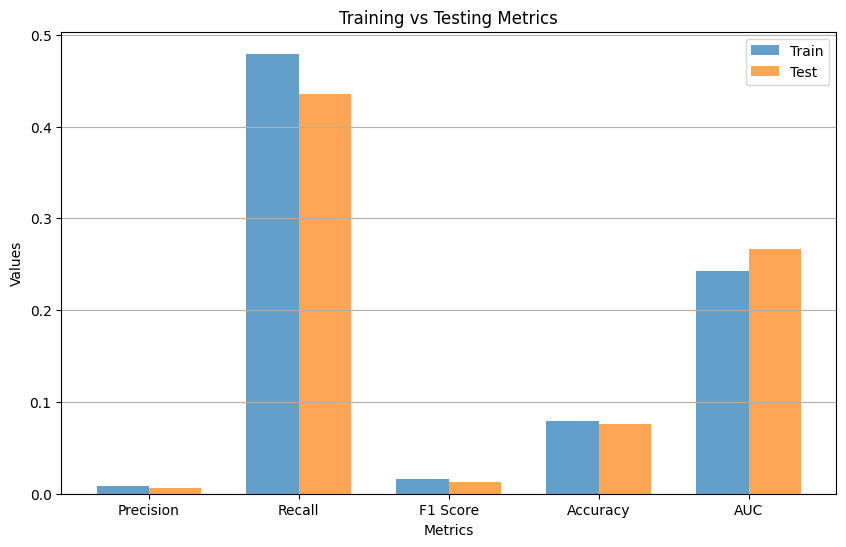

Best Hyperparameters:
{'gamma': 'auto', 'kernel': 'rbf', 'nu': 0.08}


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.008034,0.479303,0.015804,0.079360,0.242964
1,One-Class SVM (OCSVM),Test,0.006412,0.435644,0.012638,0.076065,0.266848


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import OneClassSVM
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the hyperparameter grid for tuning
# param_grid = {
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto'],
#     'nu': [0.08]
# }
param_grid = {
    'kernel': [ 'rbf'],
    'gamma': ['auto'],
    'nu': [0.08]
}
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.apply(np.log1p)
X_test = X_test.apply(np.log1p)

ocsvm = OneClassSVM()
grid_search = GridSearchCV(
    estimator=ocsvm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_params = grid_search.best_params_

y_train_pred = best_model.predict(X_train)
y_train_pred = np.where(y_train_pred == 1, 1, 0)
y_train_prob = best_model.decision_function(X_train)

train_metrics = {
    'Precision': precision_score(y_train, y_train_pred),
    'Recall': recall_score(y_train, y_train_pred),
    'F1 Score': f1_score(y_train, y_train_pred),
    'Accuracy': accuracy_score(y_train, y_train_pred),
    'AUC': roc_auc_score(y_train, y_train_prob)
}

y_test_pred = best_model.predict(X_test)
y_test_pred = np.where(y_test_pred == 1, 1, 0)
y_test_prob = best_model.decision_function(X_test)

test_metrics = {
    'Precision': precision_score(y_test, y_test_pred),
    'Recall': recall_score(y_test, y_test_pred),
    'F1 Score': f1_score(y_test, y_test_pred),
    'Accuracy': accuracy_score(y_test, y_test_pred),
    'AUC': roc_auc_score(y_test, y_test_prob)
}

final_output = pd.DataFrame({
    "Model": ["One-Class SVM (OCSVM)", "One-Class SVM (OCSVM)"],
    "Set": ["Train", "Test"],
    "Precision": [train_metrics["Precision"], test_metrics["Precision"]],
    "Recall": [train_metrics["Recall"], test_metrics["Recall"]],
    "F1 Score": [train_metrics["F1 Score"], test_metrics["F1 Score"]],
    "Accuracy": [train_metrics["Accuracy"], test_metrics["Accuracy"]],
    "AUC": [train_metrics["AUC"], test_metrics["AUC"]]
})


plt.figure(figsize=(10, 6))
metrics = ['Precision', 'Recall', 'F1 Score', 'Accuracy', 'AUC']
train_values = [train_metrics[metric] for metric in metrics]
test_values = [test_metrics[metric] for metric in metrics]

bar_width = 0.35
index = np.arange(len(metrics))

plt.bar(index, train_values, bar_width, label='Train', alpha=0.7)
plt.bar(index + bar_width, test_values, bar_width, label='Test', alpha=0.7)

plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Training vs Testing Metrics')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.grid(axis='y')
plt.show()

print("Best Hyperparameters:")
print(best_params)

final_output

# KNN

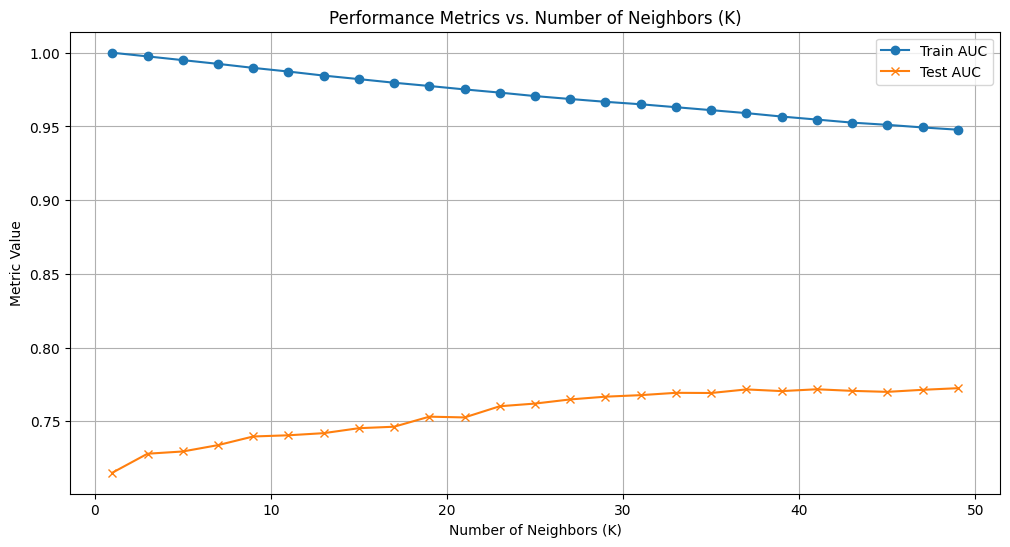

Best K :  49


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.008034,0.479303,0.015804,0.079360,0.242964
1,One-Class SVM (OCSVM),Test,0.006412,0.435644,0.012638,0.076065,0.266848
0,KNN,Train,1.000000,0.149554,0.260096,0.987199,0.947767
1,KNN,Test,1.000000,0.150000,0.260477,0.987206,0.772391


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

k_values = list(range(1, 50, 2))

k_metrics = []

best_k = None
best_auc = -1
final_train_metrics = {}
final_test_metrics = {}

for k in k_values:
    train_metrics_list = []
    test_metrics_list = []

    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        X_train = X_train.apply(np.log1p)
        X_test = X_test.apply(np.log1p)

        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        y_train_pred = knn.predict(X_train)
        y_train_pred = np.where(y_train_pred == 1, 1, 0)
        y_train_prob = knn.predict_proba(X_train)[:, 1]

        train_metrics_list.append({
            'Precision': precision_score(y_train, y_train_pred),
            'Recall': recall_score(y_train, y_train_pred),
            'F1 Score': f1_score(y_train, y_train_pred),
            'Accuracy': accuracy_score(y_train, y_train_pred),
            'AUC': roc_auc_score(y_train, y_train_prob)
        })

        y_test_pred = knn.predict(X_test)
        y_test_pred = np.where(y_test_pred == 1, 1, 0)
        y_test_prob = knn.predict_proba(X_test)[:, 1]

        test_metrics_list.append({
            'Precision': precision_score(y_test, y_test_pred),
            'Recall': recall_score(y_test, y_test_pred),
            'F1 Score': f1_score(y_test, y_test_pred),
            'Accuracy': accuracy_score(y_test, y_test_pred),
            'AUC': roc_auc_score(y_test, y_test_prob)
        })

    train_metrics_df = pd.DataFrame(train_metrics_list)
    test_metrics_df = pd.DataFrame(test_metrics_list)

    avg_train_metrics = train_metrics_df.mean()
    avg_test_metrics = test_metrics_df.mean()

    if avg_test_metrics['AUC'] > best_auc:
        best_auc = avg_test_metrics['AUC']
        best_k = k
        final_train_metrics = avg_train_metrics
        final_test_metrics = avg_test_metrics

    k_metrics.append({
        'K': k,
        'Train Precision': avg_train_metrics['Precision'],
        'Train Recall': avg_train_metrics['Recall'],
        'Train F1 Score': avg_train_metrics['F1 Score'],
        'Train Accuracy': avg_train_metrics['Accuracy'],
        'Train AUC': avg_train_metrics['AUC'],
        'Test Precision': avg_test_metrics['Precision'],
        'Test Recall': avg_test_metrics['Recall'],
        'Test F1 Score': avg_test_metrics['F1 Score'],
        'Test Accuracy': avg_test_metrics['Accuracy'],
        'Test AUC': avg_test_metrics['AUC']
    })

k_metrics_df = pd.DataFrame(k_metrics)

metrics = pd.DataFrame([
    {
        'Model': 'KNN',
        'Set': 'Train',
        'Precision': final_train_metrics['Precision'],
        'Recall': final_train_metrics['Recall'],
        'F1 Score': final_train_metrics['F1 Score'],
        'Accuracy': final_train_metrics['Accuracy'],
        'AUC': final_train_metrics['AUC']
    },
    {
        'Model': 'KNN',
        'Set': 'Test',
        'Precision': final_test_metrics['Precision'],
        'Recall': final_test_metrics['Recall'],
        'F1 Score': final_test_metrics['F1 Score'],
        'Accuracy': final_test_metrics['Accuracy'],
        'AUC': final_test_metrics['AUC']
    }
])


final_output=pd.concat([final_output,metrics],axis=0)
plt.figure(figsize=(12, 6))

# Plot Train Metrics
# plt.plot(k_metrics_df['K'], k_metrics_df['Train Precision'], label='Train Precision', marker='o')
# plt.plot(k_metrics_df['K'], k_metrics_df['Train Recall'], label='Train Recall', marker='o')
# plt.plot(k_metrics_df['K'], k_metrics_df['Train F1 Score'], label='Train F1 Score', marker='o')
# plt.plot(k_metrics_df['K'], k_metrics_df['Train Accuracy'], label='Train Accuracy', marker='o')
plt.plot(k_metrics_df['K'], k_metrics_df['Train AUC'], label='Train AUC', marker='o')

# Plot Test Metrics
# plt.plot(k_metrics_df['K'], k_metrics_df['Test Precision'], label='Test Precision', marker='x')
# plt.plot(k_metrics_df['K'], k_metrics_df['Test Recall'], label='Test Recall', marker='x')
# plt.plot(k_metrics_df['K'], k_metrics_df['Test F1 Score'], label='Test F1 Score', marker='x')
# plt.plot(k_metrics_df['K'], k_metrics_df['Test Accuracy'], label='Test Accuracy', marker='x')
plt.plot(k_metrics_df['K'], k_metrics_df['Test AUC'], label='Test AUC', marker='x')

plt.title('Performance Metrics vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)

plt.show()

print("Best K : ",best_k)
final_output

# Random Forest

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


train_metrics_list = []
test_metrics_list = []


for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):

    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]


    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)


    rf = RandomForestClassifier(n_estimators=500, max_depth=3,min_samples_split=7,min_samples_leaf=5,
                                random_state=42,
                                class_weight='balanced'
                                )

    rf.fit(X_train, y_train)
    print("Fold : ", fold)
    print("Parameters: ", rf.get_params())


    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)


    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)


    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)


train_metrics_df = pd.DataFrame(train_metrics_list)
test_metrics_df = pd.DataFrame(test_metrics_list)


avg_train_metrics = train_metrics_df.mean()
avg_test_metrics = test_metrics_df.mean()


train_final = pd.DataFrame({
    "Model": ["Random Forest (RF)"],
    "Set": ["Train"],
    "Precision": [avg_train_metrics["Precision"]],
    "Recall": [avg_train_metrics["Recall"]],
    "F1 Score": [avg_train_metrics["F1 Score"]],
    "Accuracy": [avg_train_metrics["Accuracy"]],
    "AUC": [avg_train_metrics["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["Random Forest (RF)"],
    "Set": ["Test"],
    "Precision": [avg_test_metrics["Precision"]],
    "Recall": [avg_test_metrics["Recall"]],
    "F1 Score": [avg_test_metrics["F1 Score"]],
    "Accuracy": [avg_test_metrics["Accuracy"]],
    "AUC": [avg_test_metrics["AUC"]]
})


final_output = pd.concat([final_output, train_final, test_final], axis=0)


final_output


Fold :  0
Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fold :  1
Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 500, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Fold :  2
Parameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth

,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.008034,0.479303,0.015804,0.079360,0.242964
1,One-Class SVM (OCSVM),Test,0.006412,0.435644,0.012638,0.076065,0.266848
0,KNN,Train,1.000000,0.149554,0.260096,0.987199,0.947767
1,KNN,Test,1.000000,0.150000,0.260477,0.987206,0.772391
0,Random Forest (RF),Train,0.506894,0.658929,0.572450,0.985149,0.895989
0,Random Forest (RF),Test,0.494216,0.635714,0.555482,0.984679,0.882787



Top 10 Features by Importance:
Open_12m_volatility: 0.0981
Open_24m_volatility: 0.0795
Open_6m_volatility: 0.0751
Market_Cap: 0.0749
Open_24m_avg: 0.0696
Open_12m_avg: 0.0690
drawdown_percentage: 0.0574
Volume: 0.0557
Open_3m_avg: 0.0549
Open_6m_avg: 0.0546


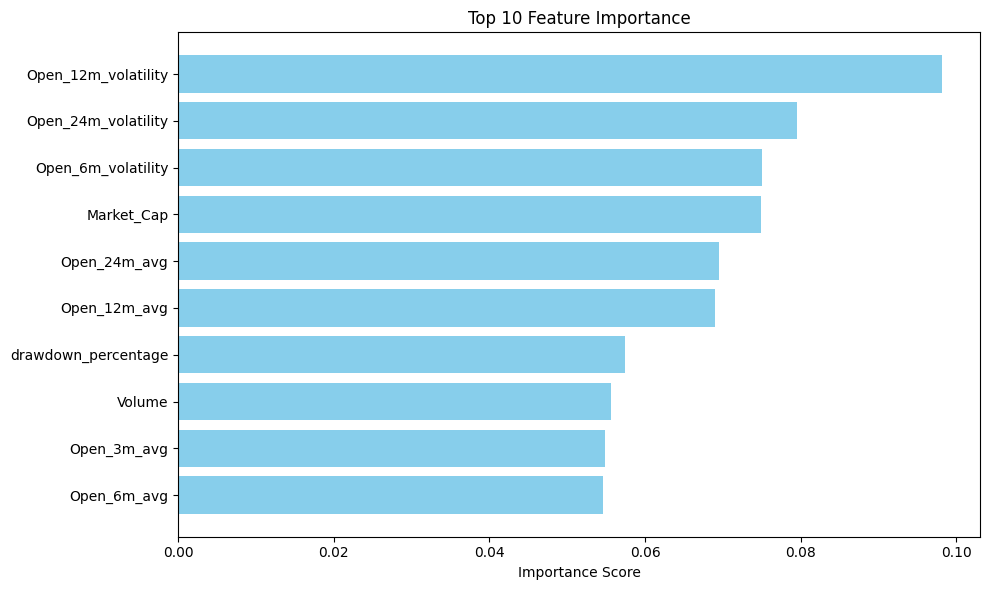

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 10
top_indices = indices[:top_n]

print("\nTop 10 Features by Importance:")
for i in range(top_n):
    print(f"{X_train.columns[top_indices[i]]}: {importances[top_indices[i]]:.4f}")

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance")
plt.barh(range(top_n), importances[top_indices], color='skyblue', align="center")
plt.yticks(range(top_n), X_train.columns[top_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

rf_full = RandomForestClassifier(n_estimators=500, max_depth=3,min_samples_split=7,min_samples_leaf=5,
                                random_state=42,
                                class_weight='balanced'
                                )
rf_full.fit(X.apply(np.log1p), y)

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_full.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_10_features = feature_importances.head(10)["Feature"].tolist()
print("Top 10 Features:", top_10_features)

X_top_10 = X[top_10_features]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_top_10, y)):
    X_train, X_test = X_top_10.iloc[train_idx], X_top_10.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    rf = RandomForestClassifier(n_estimators=500, max_depth=3,min_samples_split=7,min_samples_leaf=5,
                                random_state=42,
                                class_weight='balanced'
                                )
    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)

    y_test_pred = rf.predict(X_test)
    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)

train_metrics_df = pd.DataFrame(train_metrics_list).mean()
test_metrics_df = pd.DataFrame(test_metrics_list).mean()

train_final = pd.DataFrame({
    "Model": ["Random Forest (Top 10 Features)"],
    "Set": ["Train"],
    "Precision": [train_metrics_df["Precision"]],
    "Recall": [train_metrics_df["Recall"]],
    "F1 Score": [train_metrics_df["F1 Score"]],
    "Accuracy": [train_metrics_df["Accuracy"]],
    "AUC": [train_metrics_df["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["Random Forest (Top 10 Features)"],
    "Set": ["Test"],
    "Precision": [test_metrics_df["Precision"]],
    "Recall": [test_metrics_df["Recall"]],
    "F1 Score": [test_metrics_df["F1 Score"]],
    "Accuracy": [test_metrics_df["Accuracy"]],
    "AUC": [test_metrics_df["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)
final_output = pd.concat([final_output, metrics], axis=0)

final_output


Top 10 Features: ['Market_Cap', 'Open_12m_volatility', 'Open_6m_volatility', 'Open_24m_volatility', 'Open_12m_avg', 'High', 'Open_3m_avg', 'Open_24m_avg', 'Volume', 'drawdown_percentage']


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.008034,0.479303,0.015804,0.079360,0.242964
1,One-Class SVM (OCSVM),Test,0.006412,0.435644,0.012638,0.076065,0.266848
0,KNN,Train,1.000000,0.149554,0.260096,0.987199,0.947767
1,KNN,Test,1.000000,0.150000,0.260477,0.987206,0.772391
0,Random Forest (RF),Train,0.506894,0.658929,0.572450,0.985149,0.895989
0,Random Forest (RF),Test,0.494216,0.635714,0.555482,0.984679,0.882787
0,Random Forest (Top 10 Features),Train,0.463818,0.662500,0.545048,0.983308,0.887873
0,Random Forest (Top 10 Features),Test,0.452116,0.642857,0.530384,0.982851,0.874721


# XG Boost

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from collections import Counter

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    #xgb = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.001, min_child_weight=10, subsample=0.8, colsample_bytree=0.8, random_state=42,eval_metric='logloss')
    xgb = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.001, min_child_weight=3, subsample=0.3, colsample_bytree=0.3, random_state=42,eval_metric='auc',
    scale_pos_weight=Counter(y_train)[0]/Counter(y_train)[1])
    # xgb = XGBClassifier(
    # n_estimators=1000,
    # max_depth=4,
    # learning_rate=0.01,
    # min_child_weight=2,
    # subsample=0.8,
    # colsample_bytree=0.8,
    # scale_pos_weight=positive_class_weight,
    # random_state=42,
    # eval_metric='aucpr'
    # )


    xgb.fit(X_train, y_train)

    # print(f"Fold: {fold}")
    # print("Parameters:", xgb.get_params())

    y_train_pred = xgb.predict(X_train)
    y_test_pred = xgb.predict(X_test)

    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)

    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)

train_metrics_df = pd.DataFrame(train_metrics_list)
test_metrics_df = pd.DataFrame(test_metrics_list)

avg_train_metrics = train_metrics_df.mean()
avg_test_metrics = test_metrics_df.mean()

train_final = pd.DataFrame({
    "Model": ["XGBoost (XGB)"],
    "Set": ["Train"],
    "Precision": [avg_train_metrics["Precision"]],
    "Recall": [avg_train_metrics["Recall"]],
    "F1 Score": [avg_train_metrics["F1 Score"]],
    "Accuracy": [avg_train_metrics["Accuracy"]],
    "AUC": [avg_train_metrics["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["XGBoost (XGB)"],
    "Set": ["Test"],
    "Precision": [avg_test_metrics["Precision"]],
    "Recall": [avg_test_metrics["Recall"]],
    "F1 Score": [avg_test_metrics["F1 Score"]],
    "Accuracy": [avg_test_metrics["Accuracy"]],
    "AUC": [avg_test_metrics["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)
final_output = pd.concat([final_output, metrics], axis=0)

final_output


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.008034,0.479303,0.015804,0.079360,0.242964
1,One-Class SVM (OCSVM),Test,0.006412,0.435644,0.012638,0.076065,0.266848
0,KNN,Train,1.000000,0.149554,0.260096,0.987199,0.947767
1,KNN,Test,1.000000,0.150000,0.260477,0.987206,0.772391
0,Random Forest (RF),Train,0.506894,0.658929,0.572450,0.985149,0.895989
0,Random Forest (RF),Test,0.494216,0.635714,0.555482,0.984679,0.882787
0,Random Forest (Top 10 Features),Train,0.463818,0.662500,0.545048,0.983308,0.887873
0,Random Forest (Top 10 Features),Test,0.452116,0.642857,0.530384,0.982851,0.874721
0,XGBoost (XGB),Train,0.411710,0.673661,0.508705,0.980157,0.901479
0,XGBoost (XGB),Test,0.407247,0.653571,0.499098,0.979922,0.885722



Top 10 Features by Importance:
Open_12m_volatility: 0.0689
Open_24m_volatility: 0.0676
Market_Cap: 0.0597
drawdown_percentage: 0.0572
Open_6m_volatility: 0.0556
Open_1m_volatility: 0.0523
Open_12m_avg: 0.0505
High: 0.0486
Open_3m_avg: 0.0478
Open_24m_avg: 0.0469


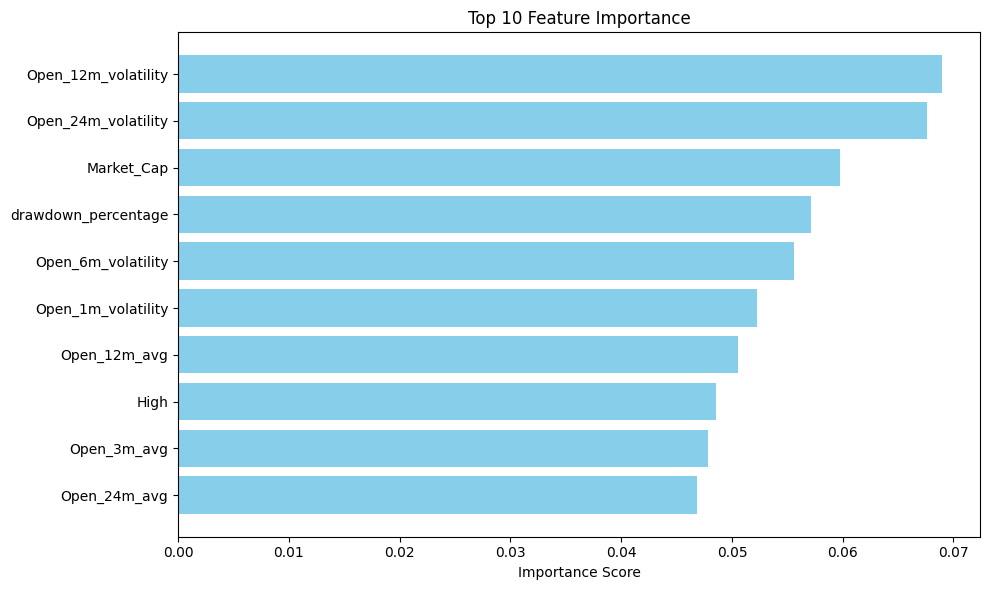

In [ ]:
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 10
top_indices = indices[:top_n]

print("\nTop 10 Features by Importance:")
for i in range(top_n):
    print(f"{X_train.columns[top_indices[i]]}: {importances[top_indices[i]]:.4f}")

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importance")
plt.barh(range(top_n), importances[top_indices], color='skyblue', align="center")
plt.yticks(range(top_n), X_train.columns[top_indices])
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from xgboost import XGBClassifier
import numpy as np
import pandas as pd

xgb_full = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.001, min_child_weight=3, subsample=0.3, colsample_bytree=0.3, random_state=42,eval_metric='auc',
                         scale_pos_weight=Counter(y_train)[0]/Counter(y_train)[1])

xgb_full.fit(X.apply(np.log1p), y)

feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_full.feature_importances_
}).sort_values(by="Importance", ascending=False)

top_10_features = feature_importances.head(10)["Feature"].tolist()
print("Top 10 Features:", top_10_features)

X_top_10 = X[top_10_features]

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X_top_10, y)):
    X_train, X_test = X_top_10.iloc[train_idx], X_top_10.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    xgb = XGBClassifier(n_estimators=500, max_depth=3, learning_rate=0.001, min_child_weight=3, subsample=0.3, colsample_bytree=0.3, random_state=42,eval_metric='auc',
                        scale_pos_weight=Counter(y_train)[0]/Counter(y_train)[1])

    xgb.fit(X_train, y_train)

    y_train_pred = xgb.predict(X_train)
    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)

    y_test_pred = xgb.predict(X_test)
    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)

train_metrics_df = pd.DataFrame(train_metrics_list).mean()
test_metrics_df = pd.DataFrame(test_metrics_list).mean()

train_final = pd.DataFrame({
    "Model": ["XGBoost (Top 10 Features)"],
    "Set": ["Train"],
    "Precision": [train_metrics_df["Precision"]],
    "Recall": [train_metrics_df["Recall"]],
    "F1 Score": [train_metrics_df["F1 Score"]],
    "Accuracy": [train_metrics_df["Accuracy"]],
    "AUC": [train_metrics_df["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["XGBoost (Top 10 Features)"],
    "Set": ["Test"],
    "Precision": [test_metrics_df["Precision"]],
    "Recall": [test_metrics_df["Recall"]],
    "F1 Score": [test_metrics_df["F1 Score"]],
    "Accuracy": [test_metrics_df["Accuracy"]],
    "AUC": [test_metrics_df["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)
final_output = pd.concat([final_output, metrics], axis=0)

final_output


Top 10 Features: ['Open_12m_volatility', 'Market_Cap', 'Open_24m_volatility', 'drawdown_percentage', 'Open_1m_volatility', 'Open_3m_avg', 'Open_6m_volatility', 'Open_12m_avg', 'Open_6m_avg', 'High']


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.008034,0.479303,0.015804,0.079360,0.242964
1,One-Class SVM (OCSVM),Test,0.006412,0.435644,0.012638,0.076065,0.266848
0,KNN,Train,1.000000,0.149554,0.260096,0.987199,0.947767
1,KNN,Test,1.000000,0.150000,0.260477,0.987206,0.772391
0,Random Forest (RF),Train,0.506894,0.658929,0.572450,0.985149,0.895989
0,Random Forest (RF),Test,0.494216,0.635714,0.555482,0.984679,0.882787
0,Random Forest (Top 10 Features),Train,0.463818,0.662500,0.545048,0.983308,0.887873
0,Random Forest (Top 10 Features),Test,0.452116,0.642857,0.530384,0.982851,0.874721
0,XGBoost (XGB),Train,0.411710,0.673661,0.508705,0.980157,0.901479
0,XGBoost (XGB),Test,0.407247,0.653571,0.499098,0.979922,0.885722


# ANN

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    mlp = MLPClassifier(hidden_layer_sizes=(32,64,32,), activation='tanh', solver='adam',
                        alpha=0.0001, max_iter=300, random_state=42)
    mlp.fit(X_train, y_train)

    y_train_pred = mlp.predict(X_train)
    y_test_pred = mlp.predict(X_test)

    train_metrics = {
        'Precision': precision_score(y_train, y_train_pred),
        'Recall': recall_score(y_train, y_train_pred),
        'F1 Score': f1_score(y_train, y_train_pred),
        'Accuracy': accuracy_score(y_train, y_train_pred),
        'AUC': roc_auc_score(y_train, mlp.predict_proba(X_train)[:, 1])
    }
    train_metrics_list.append(train_metrics)

    test_metrics = {
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'Accuracy': accuracy_score(y_test, y_test_pred),
        'AUC': roc_auc_score(y_test, mlp.predict_proba(X_test)[:, 1])
    }
    test_metrics_list.append(test_metrics)

train_metrics_df = pd.DataFrame(train_metrics_list)
test_metrics_df = pd.DataFrame(test_metrics_list)

avg_train_metrics = train_metrics_df.mean()
avg_test_metrics = test_metrics_df.mean()

train_final = pd.DataFrame({
    "Model": ["MLP (Neural Network)"],
    "Set": ["Train"],
    "Precision": [avg_train_metrics["Precision"]],
    "Recall": [avg_train_metrics["Recall"]],
    "F1 Score": [avg_train_metrics["F1 Score"]],
    "Accuracy": [avg_train_metrics["Accuracy"]],
    "AUC": [avg_train_metrics["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["MLP (Neural Network)"],
    "Set": ["Test"],
    "Precision": [avg_test_metrics["Precision"]],
    "Recall": [avg_test_metrics["Recall"]],
    "F1 Score": [avg_test_metrics["F1 Score"]],
    "Accuracy": [avg_test_metrics["Accuracy"]],
    "AUC": [avg_test_metrics["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)
final_output = pd.concat([final_output, metrics], axis=0)

final_output


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.008034,0.479303,0.015804,0.079360,0.242964
1,One-Class SVM (OCSVM),Test,0.006412,0.435644,0.012638,0.076065,0.266848
0,KNN,Train,1.000000,0.149554,0.260096,0.987199,0.947767
1,KNN,Test,1.000000,0.150000,0.260477,0.987206,0.772391
0,Random Forest (RF),Train,0.506894,0.658929,0.572450,0.985149,0.895989
0,Random Forest (RF),Test,0.494216,0.635714,0.555482,0.984679,0.882787
0,Random Forest (Top 10 Features),Train,0.463818,0.662500,0.545048,0.983308,0.887873
0,Random Forest (Top 10 Features),Test,0.452116,0.642857,0.530384,0.982851,0.874721
0,XGBoost (XGB),Train,0.411710,0.673661,0.508705,0.980157,0.901479
0,XGBoost (XGB),Test,0.407247,0.653571,0.499098,0.979922,0.885722


# Ensemble Model

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score
import numpy as np
import pandas as pd

rf_model = rf_full
xgb_model = xgb_full
knn_model = knn
mlp_model = mlp

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_metrics_list = []
test_metrics_list = []

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    X_train = X_train.apply(np.log1p)
    X_test = X_test.apply(np.log1p)

    rf_model.fit(X_train, y_train)
    xgb_model.fit(X_train, y_train)
    knn_model.fit(X_train, y_train)
    mlp_model.fit(X_train, y_train)

    voting_model = VotingClassifier(estimators=[
        ('rf', rf_model),
        ('xgb', xgb_model),
        ('knn', knn_model),
        ('mlp', mlp_model)
    ], voting='soft')

    voting_model.fit(X_train, y_train)

    y_train_pred_voting = voting_model.predict(X_train)
    y_train_prob = voting_model.predict_proba(X_train)[:, 1]

    y_test_pred_voting = voting_model.predict(X_test)
    y_test_prob = voting_model.predict_proba(X_test)[:, 1]

    train_metrics_list.append({
        'Precision': precision_score(y_train, y_train_pred_voting),
        'Recall': recall_score(y_train, y_train_pred_voting),
        'F1 Score': f1_score(y_train, y_train_pred_voting),
        'Accuracy': accuracy_score(y_train, y_train_pred_voting),
        'AUC': roc_auc_score(y_train, y_train_prob)
    })

    test_metrics_list.append({
        'Precision': precision_score(y_test, y_test_pred_voting),
        'Recall': recall_score(y_test, y_test_pred_voting),
        'F1 Score': f1_score(y_test, y_test_pred_voting),
        'Accuracy': accuracy_score(y_test, y_test_pred_voting),
        'AUC': roc_auc_score(y_test, y_test_prob)
    })

train_metrics_df = pd.DataFrame(train_metrics_list)
test_metrics_df = pd.DataFrame(test_metrics_list)

avg_train_metrics = train_metrics_df.mean()
avg_test_metrics = test_metrics_df.mean()

train_final = pd.DataFrame({
    "Model": ["Ensemble Model (RF + XGB + KNN + MLP)"],
    "Set": ["Train"],
    "Precision": [avg_train_metrics["Precision"]],
    "Recall": [avg_train_metrics["Recall"]],
    "F1 Score": [avg_train_metrics["F1 Score"]],
    "Accuracy": [avg_train_metrics["Accuracy"]],
    "AUC": [avg_train_metrics["AUC"]]
})

test_final = pd.DataFrame({
    "Model": ["Ensemble Model (RF + XGB + KNN + MLP)"],
    "Set": ["Test"],
    "Precision": [avg_test_metrics["Precision"]],
    "Recall": [avg_test_metrics["Recall"]],
    "F1 Score": [avg_test_metrics["F1 Score"]],
    "Accuracy": [avg_test_metrics["Accuracy"]],
    "AUC": [avg_test_metrics["AUC"]]
})

metrics = pd.concat([train_final, test_final], axis=0)

final_output = pd.concat([final_output, metrics], axis=0)

final_output


,Model,Set,Precision,Recall,F1 Score,Accuracy,AUC
0,One-Class SVM (OCSVM),Train,0.008034,0.479303,0.015804,0.079360,0.242964
1,One-Class SVM (OCSVM),Test,0.006412,0.435644,0.012638,0.076065,0.266848
0,KNN,Train,1.000000,0.149554,0.260096,0.987199,0.947767
1,KNN,Test,1.000000,0.150000,0.260477,0.987206,0.772391
0,Random Forest (RF),Train,0.506894,0.658929,0.572450,0.985149,0.895989
0,Random Forest (RF),Test,0.494216,0.635714,0.555482,0.984679,0.882787
0,Random Forest (Top 10 Features),Train,0.463818,0.662500,0.545048,0.983308,0.887873
0,Random Forest (Top 10 Features),Test,0.452116,0.642857,0.530384,0.982851,0.874721
0,XGBoost (XGB),Train,0.411710,0.673661,0.508705,0.980157,0.901479
0,XGBoost (XGB),Test,0.407247,0.653571,0.499098,0.979922,0.885722


In [ ]:
#final_output.to_csv("/content/drive/MyDrive/Post_DC/P3/outliers_results.csv")